In [17]:
from util.util import load_curves, load_log

# Load Data
n = [1000, 1500, 2000]
m = [10]
st = [2]
data = {}

for _n in n:
    for _mIdx in range(len(m)):
        folder_name = f"../result/_fix_1/price_curve_{st[_mIdx]}_{m[_mIdx]}_{_n}"
        local_curves, onchain_curve, average_of_local_curves = load_curves(folder_name)
        log = load_log(f"{folder_name}/logs.json")
        data[f"{st[_mIdx]}_{m[_mIdx]}_{_n}"] = {
            "local_curves": local_curves,
            "onchain_curve": onchain_curve,
            "avg_local_curves": average_of_local_curves,
            "log": {
                **log,
                "Gas": log["AliceGas"]
                + log["SuperMatcherGas"]
                + log["ReporterGas"]
                + log["WorkerGas"]
                + log["MatcherGas"],
            },
        }
        
clob_data = {}
for _n in n:
    log = load_log(f"../clob_onchain/logs_{_n}.json")
    clob_data[f"{_n}"] = log

#### Gas

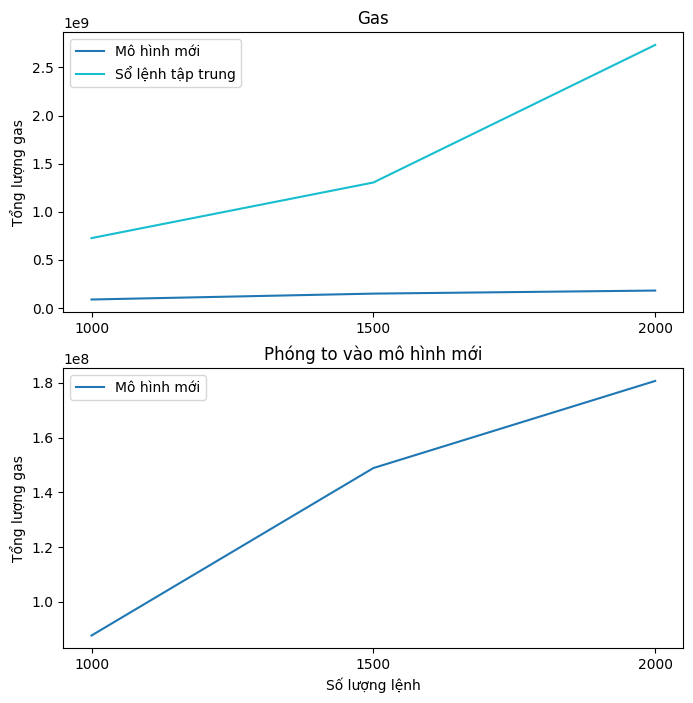

In [31]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(n))]
colors = plt.cm.tab10.colors
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
for i, _m in enumerate(m):
    for j in [0, 1]:
        axes[j].plot(
            [
                data[f"{st[i]}_{_m}_{_n}"]["log"]["Gas"]
                for _n in n
            ],
            label=f"Mô hình mới",
            color=colors[i % len(colors)], 
        )
# CLOB
_clob = [clob_data[f"{_n}"]["Gas"] for _n in n]
axes[0].plot(_clob, label="Sổ lệnh tập trung", color=colors[-1])
axes[0].set_xticks(idx)
axes[0].set_xticklabels(n)
axes[0].set_title("Gas")
axes[0].set_ylabel("Tổng lượng gas")
axes[0].legend()
    
# axes[1].plot(_clob, label="CLOB", color=colors[-1])
axes[1].set_xticks(idx)
axes[1].set_xticklabels(n)
axes[1].set_title("Phóng to vào mô hình mới")
axes[1].legend()
axes[1].set_xlabel("Số lượng lệnh")
axes[1].set_ylabel("Tổng lượng gas")
# axes[1].set_ylim(10**8, 4*10**8)
plt.savefig("Gas_compare_with_clob.png", bbox_inches="tight")
plt.show()

#### NO Matched Orders

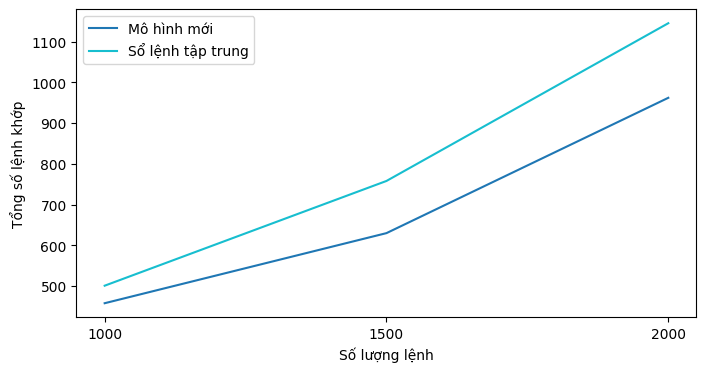

In [32]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(n))]
colors =plt.cm.tab10.colors 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
for i, _m in enumerate(m):
    axes.plot(
        [
            data[f"{st[i]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderLocal"]
            + data[f"{st[i]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderOnchain"]
            for _n in n
        ],
        label=f"Mô hình mới",
        color=colors[i % len(colors)], 
    )
# CLOB
_clob = [clob_data[f"{_n}"]["MatchTime"]  for _n in n]
axes.plot(_clob, label="Sổ lệnh tập trung", color=colors[-1])
axes.set_xticks(idx)
axes.set_xticklabels(n)
axes.legend()
axes.set_xlabel("Số lượng lệnh")
axes.set_ylabel("Tổng số lệnh khớp")
plt.savefig("NoMatchedOrder_compare_with_clob.png", bbox_inches="tight")

# # axes[1].plot(_clob, label="CLOB", color=colors[-1])
# axes[1].set_xticks(idx)
# axes[1].set_xticklabels(n)
# axes[1].set_title("Focus to protocol")
# # axes[1].set_ylim(0, 6000)
# axes[1].legend()
    
plt.show()

#### profit

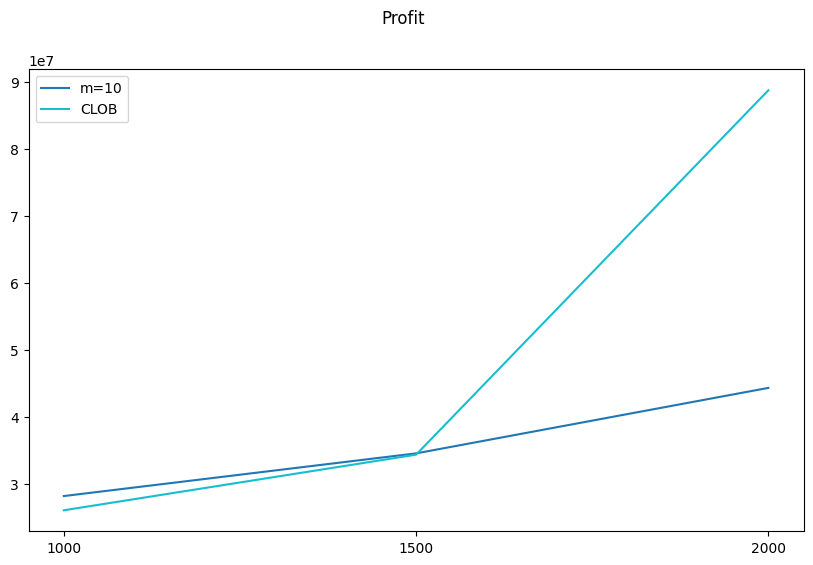

In [20]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(n))]
colors = plt.cm.tab10.colors
fig, ax = plt.subplots(figsize=(10, 6))
for i, _m in enumerate(m):
    ax.plot(
        [
            data[f"{st[i]}_{_m}_{_n}"]["log"]["TotalProfitLocal"]
            + data[f"{st[i]}_{_m}_{_n}"]["log"]["TotalProfitOnchain"]
            for _n in n
        ],
        label=f"m={_m}",
        color=colors[i % len(colors)],
    )
# CLOB
_clob = [clob_data[f"{_n}"]["Profit"] for _n in n]
ax.plot(_clob, label="CLOB", color=colors[-1])

ax.set_xticks(idx)
ax.set_xticklabels(n)
ax.legend()
fig.suptitle("Profit")
plt.show()